# Análise explorátoria

## 0.0 - Sobre o Consumidor.gov


Consumidor.gov é uma ferramenta, pública e gratuita, que intermedia conflitos entre empresas e consumidores, buscando a resolução dos problemas sem a necessidade de meios mais formais, como PROCON e JEC.

A partir da abertura da reclamação, a empresa tem até 10 dias para responder ao consumidor. Passados esses dias, o consumidor tem até 20 dias para avaliar a reclamação. 

Caso opte por avaliar, o cliente pode dizer se seu problema foi resolvido ou não, e dar uma nota à experiência com a empresa que varia de 1 a 5. 

Para saber mais, acesse: https://www.consumidor.gov.br

### 0.1 - Objetivo da análise

Esta análise foi desenvolvida para identificar quais  padrões e fatores influenciam a satisfação do consumidor e eficiência das empresas na resolução dos problemas. 

Para isso, a análise foi dividida e objetivos, listados de 1 a 5. São eles:


#### 1. Distribuição geográfica das reclamações

Explorar como as reclamações estão distribuídas pelo Brasil para identificar padrões regionais.

**Perguntas:**


- Quais regiões do Brasil têm o maior número de reclamações?

- Existem diferenças significativas na "Situação" das reclamações entre diferentes estados ou cidades?

- Como a satisfação dos consumidores varia entre diferentes regiões?



#### 2. Análise da satisfação do consumidor

Identificar os principais fatores que influenciam a satisfação do consumidor.

**Perguntas:**

- Quais segmentos de mercado têm as melhores e piores avaliações?

- Existe correlação entre o "Tempo Resposta" e a "Nota do Consumidor"?

- Como a satisfação varia entre diferentes gêneros?


#### 3. Perfil dos consumidores 

- Como a distribuição das faixas etárias dos consumidores varia entre diferentes regiões?

- Quantos consumidores fizeram contato  com a empresa  antes de  procurarem o  consumidor.gov?

- Em quais meses os consumidores registraram mais reclamações?



### 0.2 - Sobre os dados


Os dados são de reclamações registradas nos meses de janeiro a junho de 2024. A princípio, tínhamos 6 arquivos csv que foram unificados, tratados e exportados em um novo arquivo. Você pode verificar esse processo de ETL [aqui](etl_consumidor_gov.ipynb)

Com isso, temos um novo dataset que cobre o primeiro semestre de 2024, com 15 colunas e 569.713 linhas. 

As colunas são:


- **Região**:

  - Indica a região do Brasil onde o consumidor está localizado.
 
- **UF**:

  - Sigla do estado da federação.

- **Cidade**:

  - Nome da cidade onde o consumidor está localizado.

- **Sexo**:

  - Sexo do consumidor (Masculino, feminino e Outros).

- **Faixa Etária**:

  - Faixa etária do consumidor, categorizada em intervalos de idade (até 20 anos, entre 21 a 30 anos, entre 31 a 40 anos, entre 41 a 50 anos, entre 51 a 60 anos, entre 61 a 70 anos, mais de 70 anos).

- **Data Finalização**:

  - Data em que a reclamação foi finalizada.

- **Tempo Resposta**:

  - Tempo que a empresa levou para responder à reclamação, medido em dias.

- **Nome Fantasia**:

  - Nome comercial da empresa que recebeu a reclamação.

- **Segmento de Mercado**:

  - Setor ou indústria em que a empresa opera.
- **Como Comprou/Contratou**:

  - Indica como o consumidor adquiriu o produto ou serviço (e.g., Online, Loja Física).

- **Procurou Empresa**:

  - Indica se o consumidor tentou resolver o problema diretamente com a empresa antes de registrar a reclamação.

- **Respondida**:

  - Indica se a empresa respondeu à reclamação do consumidor.

- **Situação**:

  - Situação atual da reclamação, indicando se foi resolvida.

- **Avaliação Reclamação**:

  - Avaliação do consumidor sobre a resolução da reclamação, geralmente indicando satisfação ou insatisfação.

- **Nota do Consumidor**:

  - Nota dada pelo consumidor, geralmente em uma escala de 1 a 5, avaliando o atendimento e a resolução do problema.






## 1.0 - Distribuição geográfica das reclamações

Antes de tudo, precisamos importar as bibliotecas que serão usadas nesta análise. 


In [181]:
import pandas as pd 
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Após isso, faremos a leitura do dataset e olharemos 5 registros dele. 

In [182]:
data = pd.read_csv('../data/dados_consumidor_gov_semestral.csv')
info_states = gpd.read_file('../data/bcim_2016.gpkg')

data.sample(5)

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor
41473,S,SC,Águas de Chapecó,M,entre 21 a 30 anos,2024-01-16,8.0,Lojas Colombo.com,Comércio Eletrônico,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN
525484,S,PR,Curitiba,F,entre 31 a 40 anos,2024-05-29,1.0,Copel - Companhia Paranaense de Energia,Energia Elétrica,Loja física,S,S,Finalizada avaliada,Não Resolvida,1.0
461921,SE,SP,São Paulo,F,entre 31 a 40 anos,2024-05-06,10.0,Cartões Itaú,"Bancos, Financeiras e Administradoras de Cartão",Telefone,S,S,Finalizada não avaliada,Não Avaliada,NaN
502231,NE,BA,Feira de Santana,F,entre 31 a 40 anos,2024-05-24,7.0,Caixa Econômica Federal,"Bancos, Financeiras e Administradoras de Cartão",Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0
530468,SE,SP,Guarulhos,M,entre 41 a 50 anos,2024-06-18,10.0,Banco Santander Cartões,"Bancos, Financeiras e Administradoras de Cartão",Internet,S,S,Finalizada avaliada,Resolvida,5.0


***1° Pergunta*** 
- Quais regiões, estados e cidades do Brasil têm o maior número de reclamações?


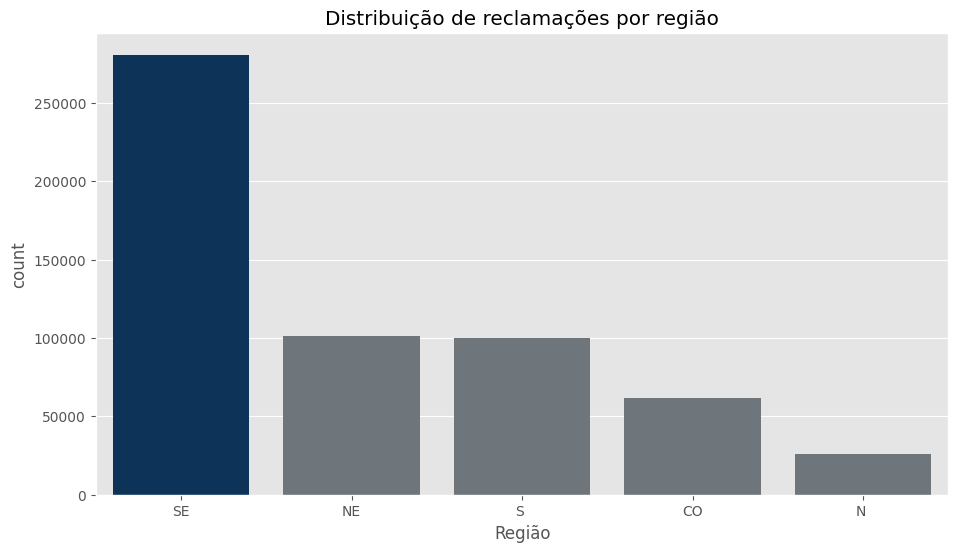

In [183]:
recurrence_by_region = data['Região'].value_counts()


ax = sns.countplot(data, x='Região', 
                   palette=['#003366', '#6c757d', '#6c757d', '#6c757d', '#6c757d'], 
                   order=recurrence_by_region.index)

ax.set_title('Distribuição de reclamações por região')
ax.figure.set_size_inches(11, 6)

A região com o maior número de reclamações é a sudeste, com 280.732 registros equivalentes a quase 50% das ocorrências, seguida pela região nordeste e sul, com 101.014 e 100.198, respectivamente.

Abaixo,veremos os Estados.

In [184]:
recurrence_by_state = data['UF'].value_counts()
df_recurrence_by_state = recurrence_by_state.reset_index()
df_recurrence_by_state.columns = ['UF', 'Frequência']

In [185]:

location_states = info_states[['sigla','geometry']]
location_states.rename({'sigla':'UF'}, axis = 1, inplace=True)
map_brazil  =  location_states.merge(df_recurrence_by_state, on= 'UF', how='left')

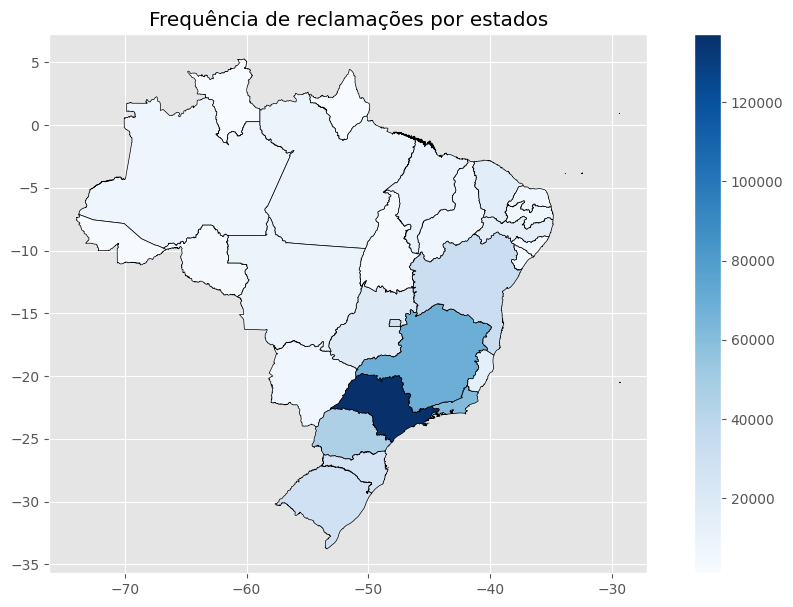

In [203]:
map_brazil.plot( column = 'Frequência',
             cmap = 'Blues',
             figsize = (12,7),
             linewidth=0.5,   
             legend = True,
             edgecolor  = 'black',
             )
plt.title('Frequência de reclamações por estados')

plt.show()

São Paulo lidera os estados com mais reclamações, com quase o dobro de registros que o segundo colocado, Minas Gerais. O terceiro lugar pertence ao Rio de Janeiro. 


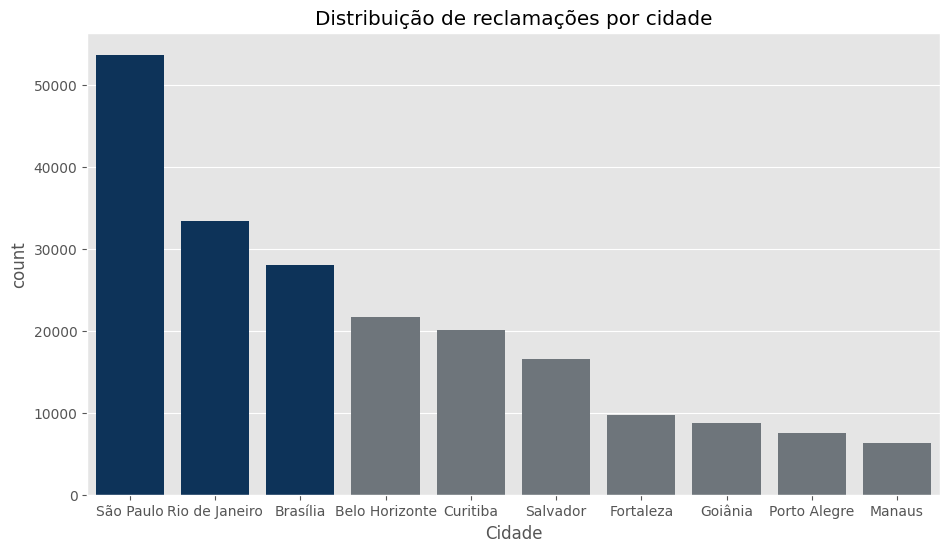

In [187]:
recurrence_by_city = data['Cidade'].value_counts().head(10)




ax = sns.countplot(data=data, x='Cidade', palette=[

    '#003366', '#003366', '#003366', '#6c757d', '#6c757d',
    '#6c757d', '#6c757d', '#6c757d', '#6c757d', '#6c757d'], 

     order=recurrence_by_city.index)

ax.set_title('Distribuição de reclamações por cidade')
ax.figure.set_size_inches(11, 6)




São Paulo, Rio de Janeiro e Brasília são as cidades com mais reclamações.

Até o 5° lugar, todas possuem mais de 2 mil reclamações no primeiro semestre. 

Naturalmente, as regiões, estados e cidades mais populosos, como esperado, concentram o maior número de reclamantes. 

***2° Pergunta*** 
- Existem diferenças significativas na "Situação" das reclamações entre diferentes estados e cidades?


In [188]:
complaints_status = data[data['Avaliação Reclamação'] != 'Não Avaliada']

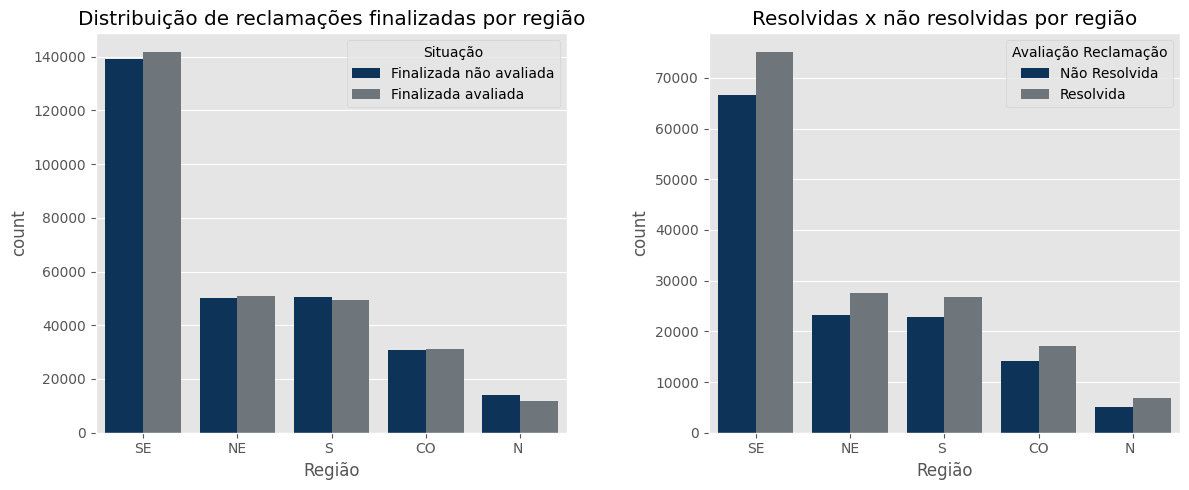

In [189]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

sns.countplot(ax=axes[0], data=data, x='Região', 
              palette=['#003366', '#6c757d'], 
              order=recurrence_by_region.index, 
              hue=data['Situação'])

axes[0].set_title('Distribuição de reclamações finalizadas por região')


complaints_status = data[data['Avaliação Reclamação'] != 'Não Avaliada']
sns.countplot(ax=axes[1], data=complaints_status, x='Região', 
              palette=['#003366', '#6c757d'], 
              order=recurrence_by_region.index, 
              hue=complaints_status['Avaliação Reclamação'])

axes[1].set_title('Resolvidas x não resolvidas por região')


plt.tight_layout()
fig.subplots_adjust(wspace=0.3)  



As regiões Sul e Norte são as únicas onde o número de reclamações não avaliadas supera, ainda que ligeiramente, as avaliadas. 

Em todas as regiões, o número de reclamações avaliadas como resolvidas supera as não resolvidas. 

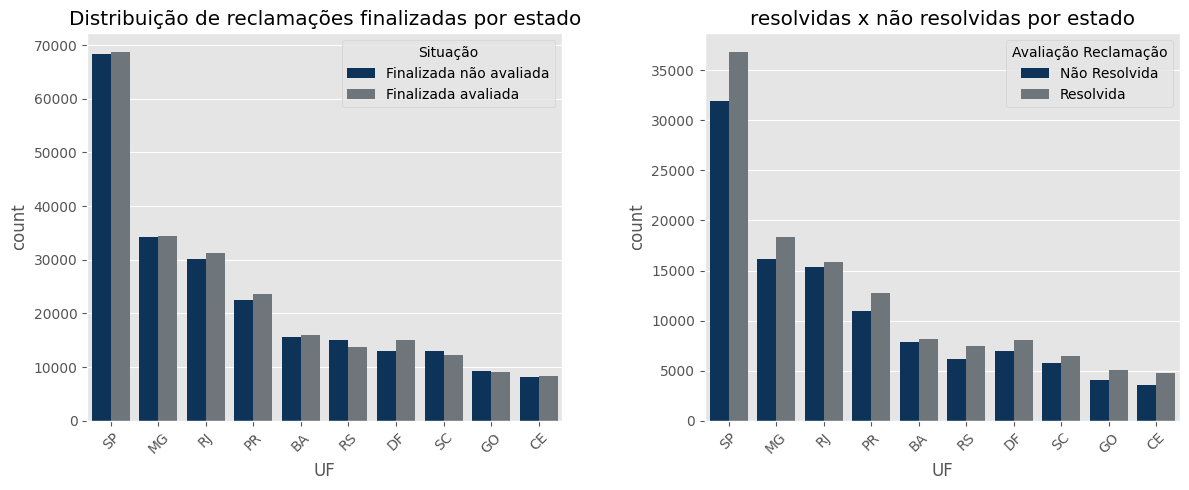

In [190]:
top_recurrence_by_state = recurrence_by_state.head(10)
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

sns.countplot(ax=axes[0], data=data, x='UF', 
              palette=['#003366', '#6c757d'], 
              order=top_recurrence_by_state.index, 
              hue=data['Situação'])

axes[0].set_title('Distribuição de reclamações finalizadas por estado')
axes[0].tick_params("x",labelrotation=45)

sns.countplot(ax=axes[1], data=complaints_status, x='UF', 
              palette=['#003366', '#6c757d'], 
              order=top_recurrence_by_state.index, 
              hue=complaints_status['Avaliação Reclamação'])

axes[1].set_title('resolvidas x não resolvidas por estado')
axes[1].tick_params("x",labelrotation=45)

plt.tight_layout()
fig.subplots_adjust(wspace=0.3)  

Dos 10 estados com mais reclamaçẽos, Rio Grande do Sul, Santa Catarina e Goiás são os únicos em que o número de reclamaçẽos não avaliadas está acima das avaliadas. 

Em todos estados, há mais avaliações resolvidas, que não resolvidas.


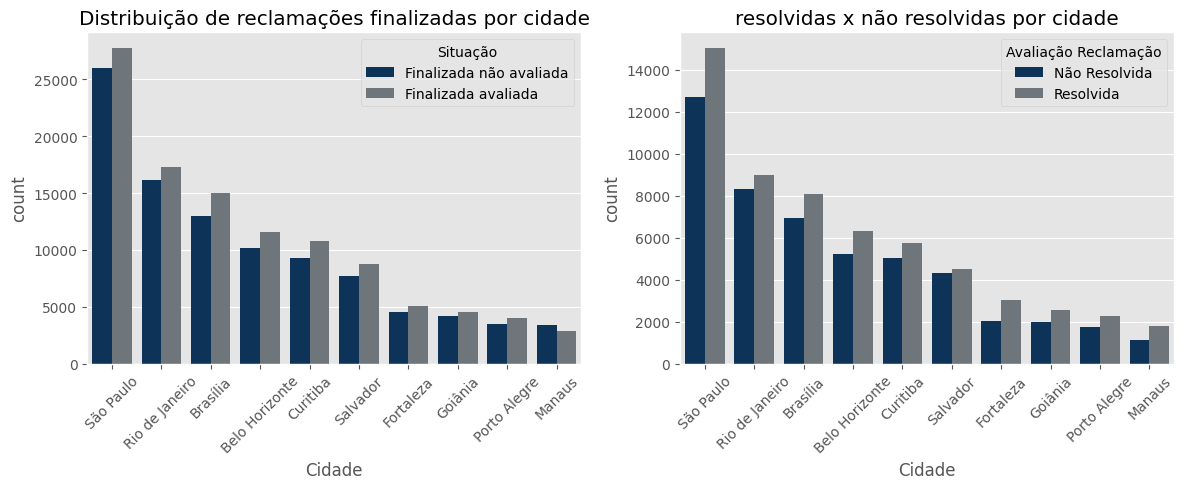

In [191]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(ax=axes[0], data=data, x='Cidade', 
              palette=['#003366', '#6c757d'], 
              order=recurrence_by_city.index, 
              hue=data['Situação'])

axes[0].set_title('Distribuição de reclamações finalizadas por cidade')
axes[0].tick_params("x",labelrotation=45)

sns.countplot(ax=axes[1], data=complaints_status, x='Cidade', 
              palette=['#003366', '#6c757d'], 
              order=recurrence_by_city.index, 
              hue=complaints_status['Avaliação Reclamação'])
 
axes[1].set_title('resolvidas x não resolvidas por cidade')


plt.tight_layout()
fig.subplots_adjust(wspace=0.2)
axes[1].tick_params("x",labelrotation=45)



Das cidades, apenas Manaus possui o número de reclamações não avaliadas maior que as avaliadas. 



***3° Pergunta*** 
- Como a satisfação dos consumidores varia entre diferentes regiões?


Para mensurar a satisfação dos consumidores, criaremos um novo conjunto de dados apenas com as reclamações avaliadas.


Após isso, veremos a média da nota por região.

In [192]:
filtered_region = data[data['Situação'] == 'Finalizada avaliada']

customer_review = (filtered_region
                   .groupby('Região')['Nota do Consumidor']
                   .mean()
                   .reset_index()
                   .sort_values('Nota do Consumidor',ascending=False))


customer_review

,Região,Nota do Consumidor
1,N,3.058030
2,NE,2.933114
0,CO,2.915269
3,S,2.861266
4,SE,2.815939


A região Norte possui a maior  média de nota, e todas as regiões possuem uma média maior,  ou igual a 2.81.

Além das médias, veremos como as notas estão distribuídas por região. 


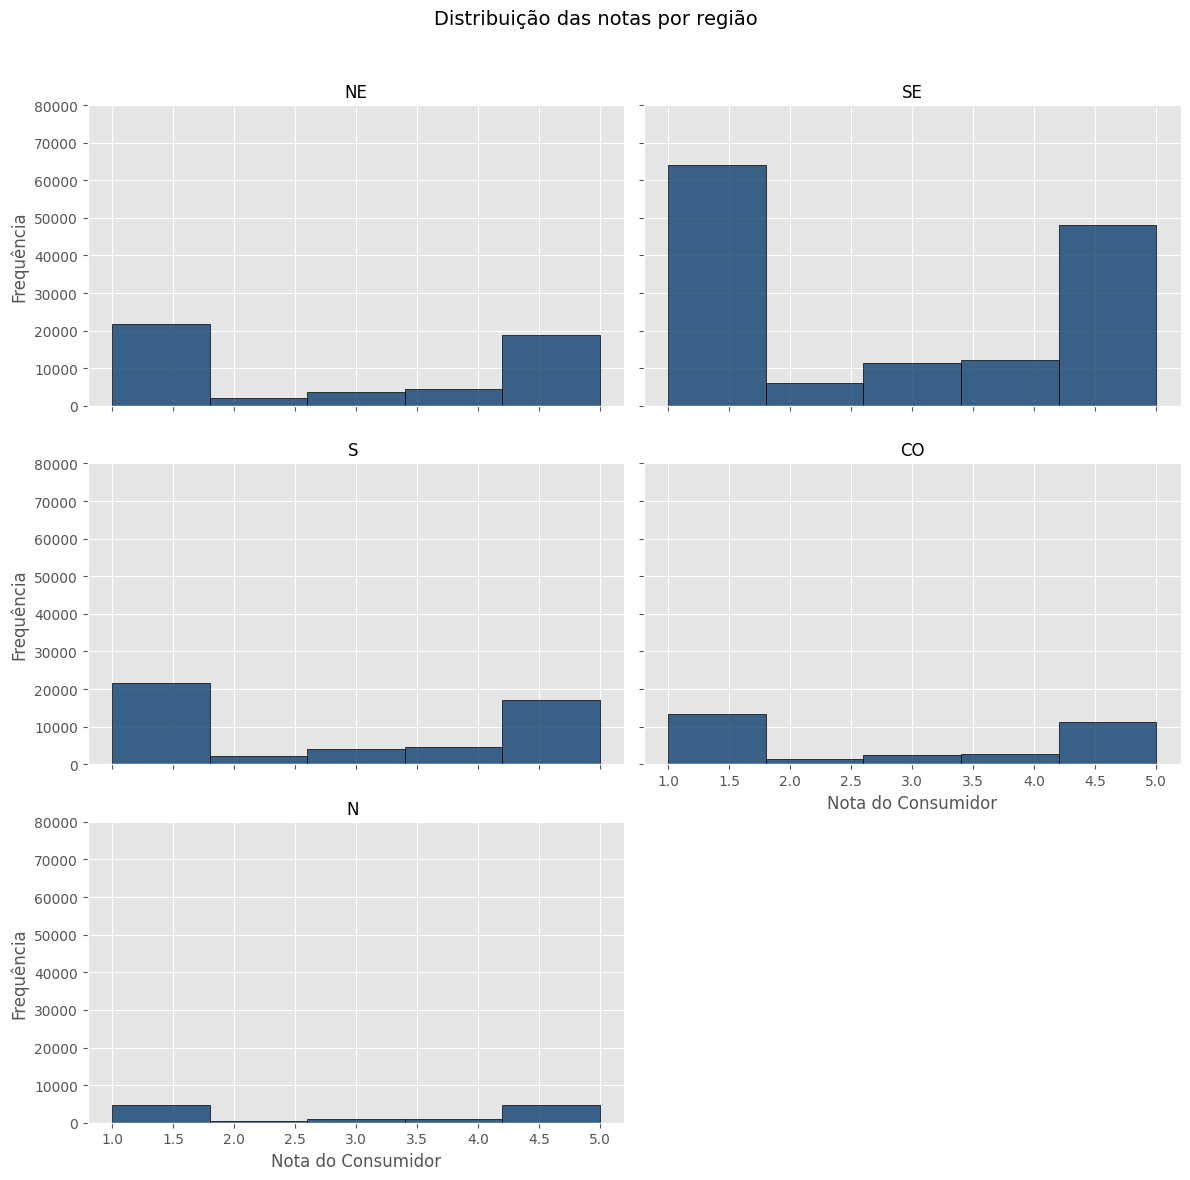

In [193]:

g = sns.FacetGrid(filtered_region, col='Região', col_wrap=2, height=4,sharex=True, sharey=True, aspect=1.5)


g.map(sns.histplot, 'Nota do Consumidor', bins=5, edgecolor='black',color='#003366',)


g.set_titles(col_template='{col_name}')
g.set_axis_labels('Nota do Consumidor', 'Frequência')


g.figure.suptitle("Distribuição das notas por região", fontsize=14)

plt.subplots_adjust(top=0.9) 
fig.subplots_adjust(wspace=0.5,hspace=0.5)

for ax in g.axes.flat:
    ax.set_ylim(0, 80000)
    
  

Como esperado, a região Sudeste possui o maior número de avaliações. Apesar dessa diferença, todas as regiões seguem um padrão: as notas 1 e 5 são mais frequentes do que as demais. 

Isso sugere que os consumidores tendem a avaliar principalmente quando estão muito insatisfeitos ou muito satisfeitos com o atendimento e experiência oferecidos pela empresa.


# 3. Análise da satisfação do consumidor

***1° Pergunta***
- Quais segmentos de mercado recebem o maior número de reclamações? E como as avaliações positivas se comparam às negativas nesses segmentos?

Primeiro, vamos visualizar quais são os 10 segmentos com mais reclamações.


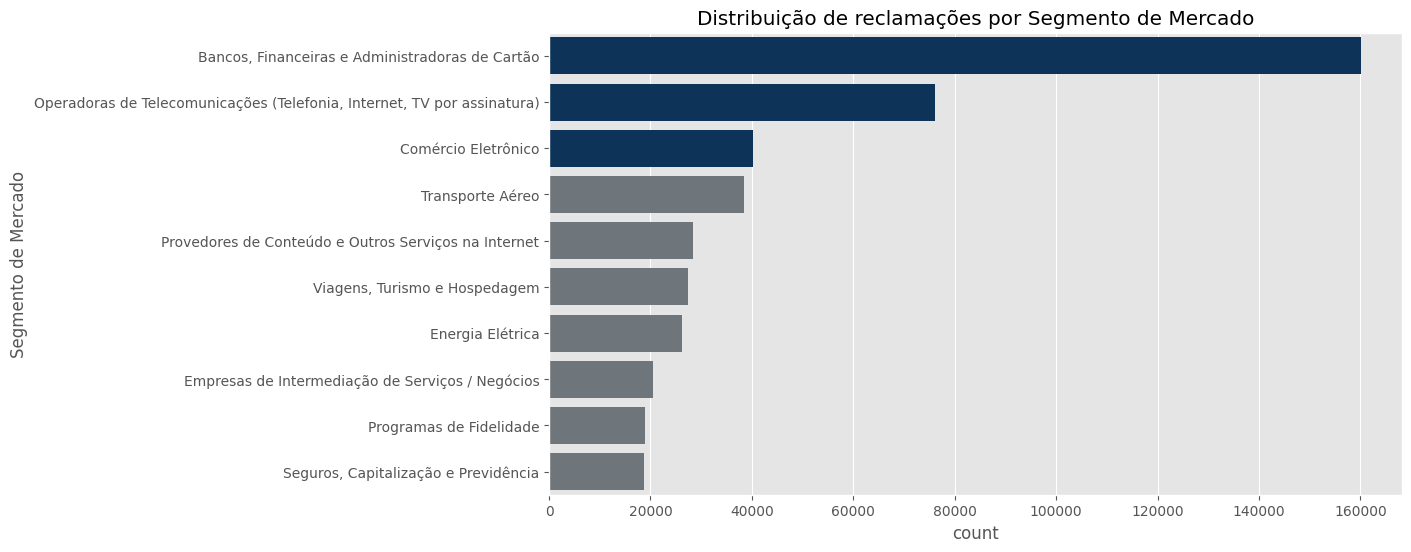

In [194]:

recurrence_by_segment = data['Segmento de Mercado'].value_counts().head(10)

ax = sns.countplot(
    data=data, 
    y='Segmento de Mercado', 
    orient='h',  
    palette=[
        '#003366', '#003366', '#003366', '#6c757d', '#6c757d',
        '#6c757d', '#6c757d', '#6c757d', '#6c757d', '#6c757d'
    ], 
    order=recurrence_by_segment.index  
)

ax.set_title('Distribuição de reclamações por Segmento de Mercado')
ax.figure.set_size_inches(11, 6)


As empresas do segmento bancário lideram o ranking, com mais que o dobro de reclamações em comparação ao segundo colocado.

/tmp/ipykernel_4884/1442317187.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


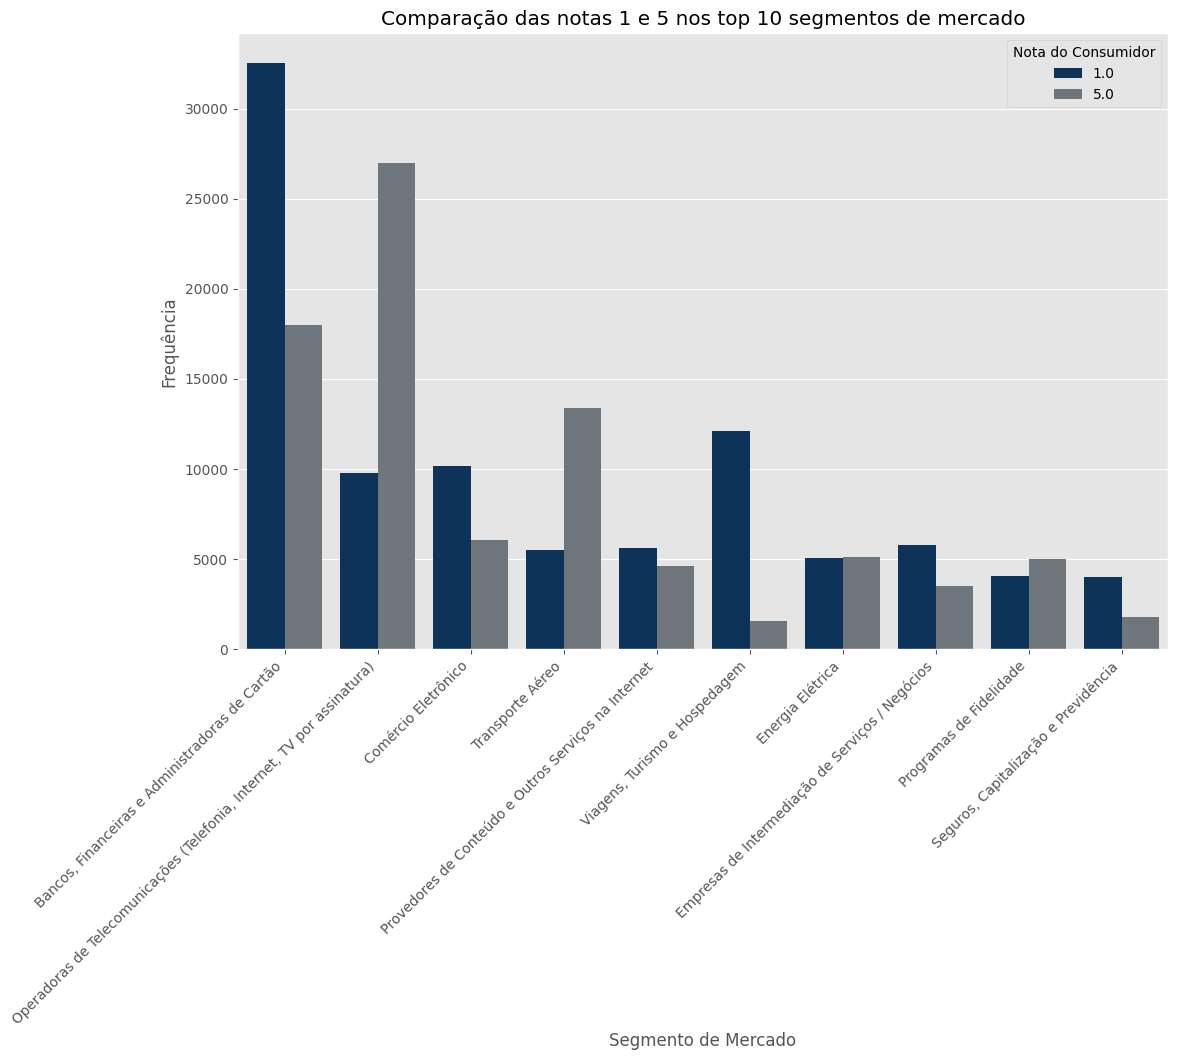

In [195]:
segment_by_evaluation =  data[data['Nota do Consumidor'].isin([1,5])]


recurrence_by_segment = data['Segmento de Mercado'].value_counts().head(10).index



filtered_data_top_segments = segment_by_evaluation[segment_by_evaluation['Segmento de Mercado'].isin(recurrence_by_segment)]



plt.figure(figsize=(12, 8))
ax = sns.countplot(
    data=filtered_data_top_segments, 
    x='Segmento de Mercado', 
    hue='Nota do Consumidor',
    palette=['#003366', '#6c757d'], 
    order=recurrence_by_segment  )


ax.set_xlabel('Segmento de Mercado')
ax.set_ylabel('Frequência')
ax.set_title('Comparação das notas 1 e 5 nos top 10 segmentos de mercado')
_=ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')




Desses segmentos, os únicos com mais notas 5 que 1 são: Operadoras de Telecomunicações, Transporte Aéreo, Energia Elétrica e Programas de Fidelidade.

***2° Pergunta***
- Existe correlação entre o "Tempo Resposta" e a "Nota do Consumidor"?



In [196]:

filtered_region[['Tempo Resposta','Nota do Consumidor']].corr()

,Tempo Resposta,Nota do Consumidor
Tempo Resposta,1.000000,-0.014599
Nota do Consumidor,-0.014599,1.000000


A correlação entre ```Tempo Resposta``` e ``` Nota do Consumidor``` é quase inexistente.

***3° Pergunta***
- Como as notas variam entre diferentes gêneros?

<Axes: xlabel='Nota do Consumidor', ylabel='Count'>

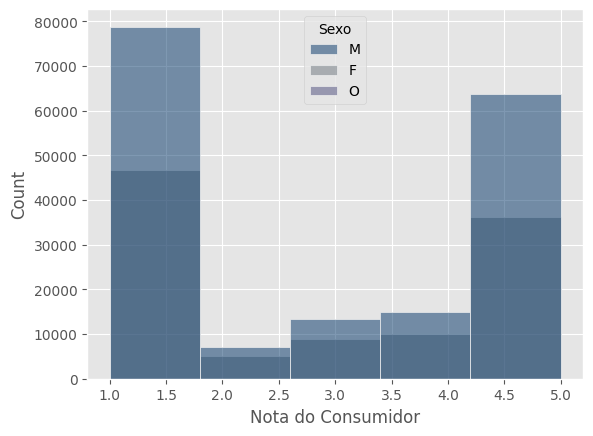

In [197]:

sns.histplot(data=filtered_region, x='Nota do Consumidor', hue='Sexo',bins=5,palette=['#003366', '#6c757d', '#4A4A7A']) 



Assim como nas regiões, há mais notas 1 e 5 entre homens e mulheres. 


Como as pessoas que não se identificaram como homens ou mulheres não aparecem no gráfico acima, plotaremos um novo histograma para incluir esses dados e entender a variação.

<Axes: xlabel='Nota do Consumidor', ylabel='Count'>

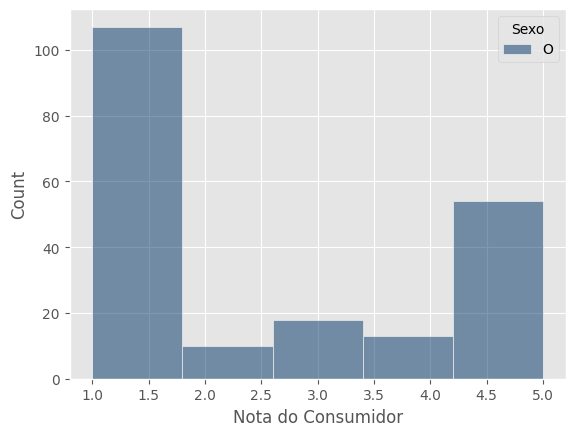

In [198]:
other_sex = filtered_region[(filtered_region['Sexo'] == 'O')]

sns.histplot(data=other_sex, x='Nota do Consumidor', hue='Sexo',bins=5,palette=['#003366']) 

O padrão continua: mais notas 1 que 5.

Ainda que as reclamações sejam resolvidas, o consumidor não fica satisfeito.

# 3. Perfil dos consumidores 

***1° Pergunta***

Como a distribuição das faixas etárias dos consumidores varia entre diferentes regiões?




In [199]:
crosstab_ages =pd.crosstab(data['Faixa Etária'], data['Região'], normalize='index')
crosstab_ages

Região,CO,N,NE,S,SE
Faixa Etária,,,,,
até 20 anos,0.095238,0.062190,0.236593,0.162536,0.443443
entre 21 a 30 anos,0.107334,0.049661,0.196144,0.172743,0.474119
entre 31 a 40 anos,0.113533,0.040778,0.176451,0.174028,0.495210
entre 41 a 50 anos,0.116008,0.040051,0.158299,0.171079,0.514564
entre 51 a 60 anos,0.107019,0.043124,0.156887,0.185606,0.507364
entre 61 a 70 anos,0.076556,0.063871,0.190960,0.199526,0.469087
mais de 70 anos,0.075065,0.075957,0.203145,0.187338,0.458495


Para todas as faixas etárias, mais de 45% dos consumidores residem no sudeste brasileiro.


***2° pergunta***

-Quantos consumidores fizeram contato  com a empresa  antes de  procurarem o  consumidor.gov?


<Axes: xlabel='Procurou Empresa', ylabel='count'>

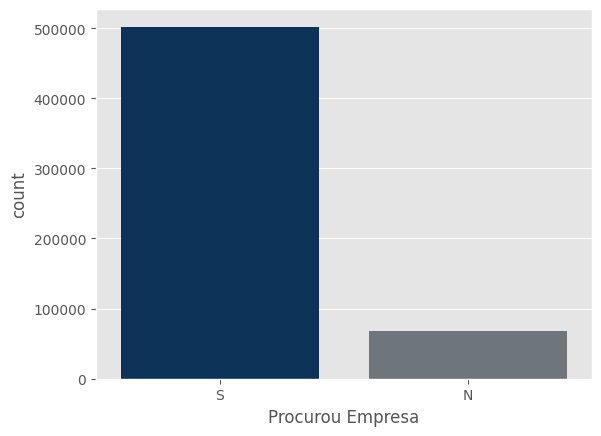

In [200]:
sns.countplot(data=data, x='Procurou Empresa', palette=['#003366', '#6c757d'])


88% dos consumidores procuraram a empresa antes de buscarem auxilio no consumidor.gov.


Se a empresa tivesse resolvido o problema no contato anterior, não teria sido necessário empregar esforços por meio da plataforma, economizando tempo e  energia da  empresa e cliente. 


***3° Pergunta***

Em quais meses os consumidores registraram mais reclamações? 


Como a coluna ```Data Finalização``` está categorizada como ```object```, iremos convertê-la para ```datetime```, que é o tipo dados correto para registros de datas.


In [201]:
data['Data Finalização']= pd.to_datetime(data['Data Finalização'])

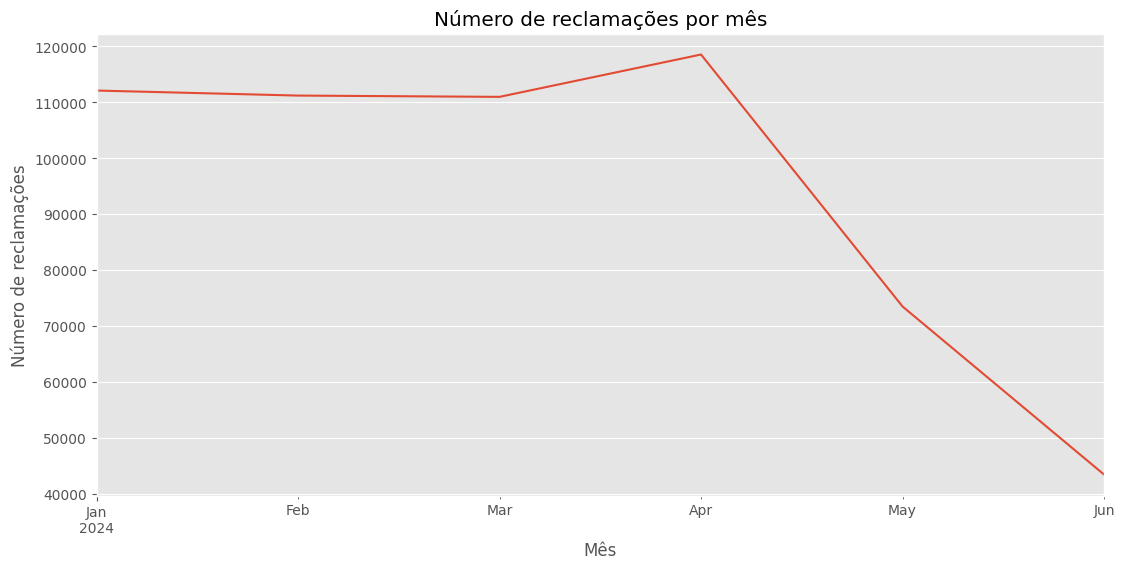

In [202]:
monthly_data = data.groupby(data['Data Finalização'].dt.to_period('M')).size()
monthly_data_group = pd.DataFrame(monthly_data)

monthly_data_group.plot(kind='line', title='Número de reclamações por mês', legend=False,figsize=(13,6))
plt.xlabel('Mês')
_=plt.ylabel('Número de reclamações')




Em abril, observamos o maior número de reclamações, com um pico significativo. Antes desse mês, a média mensal de reclamações era de cerca de 111 mil. 

Após abril, houve uma queda acentuada no número de reclamações: em maio, foram registradas aproximadamente 73 mil reclamações, e em junho, o número caiu para cerca de 43 mil.


# Conclusão

Após a análise, esses são os principais insights que nos mostram os dados:

   - A região Sudeste lidera o número de reclamações, com São Paulo como o estado e cidade com mais registros. Este padrão era esperado, dada a maior população da região.

   - Apesar de a maioria das reclamações serem avaliadas e resolvidas, há exceções, como nos estados do Sul e em Manaus, onde as reclamações não avaliadas superam as avaliadas.

   - O segmento bancário lidera em número de reclamações, mas nem sempre as maiores reclamações estão associadas às piores avaliações. Segmentos como Telecomunicações e Transporte Aéreo se destacam por terem mais avaliações positivas que negativas.

   - Não foi observada uma correlação significativa entre o tempo de resposta das empresas e as notas dos consumidores, sugerindo que outros fatores podem ser mais determinantes para a satisfação.

   - A variação das notas entre os gêneros segue o mesmo padrão, com notas extremas (1 e 5) sendo mais comuns, indicando que os consumidores tendem a avaliar quando estão muito satisfeitos ou insatisfeitos.

   - O Sudeste concentra a maior parte dos consumidores em todas as faixas etárias.

   - A maioria dos consumidores tentou resolver o problema diretamente com a empresa antes de recorrer ao **Consumidor.gov**, o que indica que as empresas poderiam evitar muitos desses conflitos se agissem de forma mais eficaz no primeiro contato.

   - Abril foi o mês com o maior número de reclamações.
